# Valuation of USD Swap using Different Curve Building Assumptions

This follows example mentioned in the blogpost at https://blog.deriscope.com/index.php/en/excel-interest-rate-swap-price-dual-bootstrapping-curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *

####################################################################
# FINANCEPY BETA Version 0.191 - This build:  17 Jan 2021 at 18:30 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



In [3]:
valuation_date = Date(22, 5, 2019)

## Building the Discounting OIS Curve

We construct the OIS curve from a series of swaps, some forward starting. The default assumption on the floating leg is annual payments.

In [4]:
depoDCCType = DayCountTypes.ACT_360
depos = []

spot_days = 0
settlement_date = valuation_date.add_weekdays(spot_days)
depo = IborDeposit(settlement_date, "1D", 2.3900/100.0, depoDCCType); depos.append(depo)

spot_days = 2
settlement_date = valuation_date.add_weekdays(spot_days)

fras = []

swaps = []
swapType = SwapTypes.PAY
fixedDCCType = DayCountTypes.ACT_365F
fixedFreqType = FrequencyTypes.ANNUAL

# Standard OIS with standard annual terms
swap = OIS(settlement_date, "1W", swapType, 2.3883/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "2W", swapType, 2.3842/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "3W", swapType, 2.3920/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "1M", swapType, 2.3885/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "2M", swapType, 2.3850/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "3M", swapType, 2.3770/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "4M", swapType, 2.3700/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "5M", swapType, 2.3550/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "6M", swapType, 2.3383/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "9M", swapType, 2.2810/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "12M", swapType, 2.2280/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "18M", swapType, 2.1264/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "2Y", swapType, 2.0547/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "3Y", swapType, 1.9830/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "4Y", swapType, 1.9650/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "5Y", swapType, 1.9730/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "7Y", swapType, 2.0252/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "10Y", swapType, 2.1155/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "12Y", swapType, 2.1703/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "15Y", swapType, 2.2254/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "20Y", swapType, 2.2719/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "25Y", swapType, 2.2860/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "30Y", swapType, 2.2865/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "40Y", swapType, 2.2714/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = OIS(settlement_date, "50Y", swapType, 2.2406/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)

oisDepos = depos.copy()
oisFras = fras.copy()
oisSwaps = swaps.copy()

In [5]:
oisCurves = {}
for interp_type in InterpTypes:
    oisCurve = OISCurve(valuation_date, oisDepos, oisFras, oisSwaps, interp_type)
    oisCurves[interp_type] = oisCurve

## Building the Dual Curve

Now we build the dual curve

In [6]:
mmDCType = DayCountTypes.ACT_360
depos = []

spot_days = 0
settlement_date = valuation_date.add_weekdays(spot_days)
depo = IborDeposit(settlement_date, "3M", 2.52338/100.0, mmDCType); depos.append(depo)

fras = []
f1 = settlement_date.next_imm_date()
f2 = f1.next_imm_date()
f3 = f2.next_imm_date()
f4 = f3.next_imm_date()
f5 = f4.next_imm_date()
f6 = f5.next_imm_date()
f7 = f6.next_imm_date()

fra = IborFRA(f1, f2, 2.5249/100, mmDCType); fras.append(fra)
fra = IborFRA(f2, f3, 2.4344/100, mmDCType); fras.append(fra)
fra = IborFRA(f3, f4, 2.3737/100, mmDCType); fras.append(fra)
fra = IborFRA(f4, f5, 2.2376/100, mmDCType); fras.append(fra)
fra = IborFRA(f5, f6, 2.1363/100, mmDCType); fras.append(fra)
fra = IborFRA(f6, f7, 2.0748/100, mmDCType); fras.append(fra)

swaps = []
swapType = SwapTypes.PAY
fixedDCCType = DayCountTypes.THIRTY_360_BOND
fixedFreqType = FrequencyTypes.SEMI_ANNUAL

swap = IborSwap(settlement_date, "2Y", swapType, 2.2892/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "3Y", swapType, 2.2184/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "4Y", swapType, 2.2004/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "5Y", swapType, 2.2097/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "6Y", swapType, 2.2340/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "7Y", swapType, 2.2621/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "8Y", swapType, 2.2936/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "9Y", swapType, 2.3265/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "10Y", swapType, 2.3585/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "11Y", swapType, 2.3885/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "12Y", swapType, 2.4161/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "15Y", swapType, 2.4759/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "20Y", swapType, 2.5288/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "25Y", swapType, 2.5455/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "30Y", swapType, 2.5510/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "40Y", swapType, 2.5347/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = IborSwap(settlement_date, "50Y", swapType, 2.5050/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)

iborDepos = depos.copy()
iborFras = fras.copy()
ibor_swaps = swaps.copy()

In [7]:
iborSingleCurves = {}
for interp_type in InterpTypes:
    iborSingleCurves[interp_type] = IborSingleCurve(valuation_date, iborDepos, iborFras, ibor_swaps, interp_type)

In [8]:
iborDualCurves = {}
for interp_type in InterpTypes:
    oisCurve = oisCurves[interp_type]
    iborDualCurves[interp_type] = IborDualCurve(valuation_date, oisCurve, iborDepos, iborFras, ibor_swaps, interp_type)

## Swap Valuation

In [9]:
settlement_date = valuation_date.add_weekdays(2)
start_date = settlement_date.add_tenor("7M")
maturity_date = start_date.add_tenor("5Y")
notional = ONE_MILLION
swapType = SwapTypes.PAY
fixedRate = 0.0218
fixedDCCType = DayCountTypes.THIRTY_360_BOND
fixedFreqType = FrequencyTypes.SEMI_ANNUAL
float_spread = 0.0
floatDCCType = DayCountTypes.ACT_360
floatFreqType = FrequencyTypes.QUARTERLY

In [10]:
offMarketSwap = IborSwap(start_date, maturity_date, swapType, 
                            fixedRate, fixedFreqType, fixedDCCType,
                            notional,
                            float_spread, floatFreqType, floatDCCType, 
                            CalendarTypes.UNITED_KINGDOM)

In [11]:
swapSingleValues = {}
for interp_type in InterpTypes:
    oisCurve = oisCurves[interp_type]
    iborSingleCurve = iborSingleCurves[interp_type]
    swapSingleValues[interp_type] = offMarketSwap.value(valuation_date, iborSingleCurve)

In [12]:
swapDualValues = {}
for interp_type in InterpTypes:
    oisCurve = oisCurves[interp_type]
    iborDualCurve = iborDualCurves[interp_type]
    swapDualValues[interp_type] = offMarketSwap.value(valuation_date, oisCurve, iborDualCurve)

In [13]:
swapSingleValues

{<InterpTypes.FLAT_FWD_RATES: 1>: 341.57392326786066,
 <InterpTypes.LINEAR_FWD_RATES: 2>: 72.09588952027843,
 <InterpTypes.LINEAR_ZERO_RATES: 4>: 280.3020597731811,
 <InterpTypes.FINCUBIC_ZERO_RATES: 7>: 226.43284398420656,
 <InterpTypes.NATCUBIC_LOG_DISCOUNT: 8>: 229.95914185675792,
 <InterpTypes.NATCUBIC_ZERO_RATES: 9>: 228.0175339464913,
 <InterpTypes.PCHIP_ZERO_RATES: 10>: 206.0346326756262,
 <InterpTypes.PCHIP_LOG_DISCOUNT: 11>: 231.49409827608906}

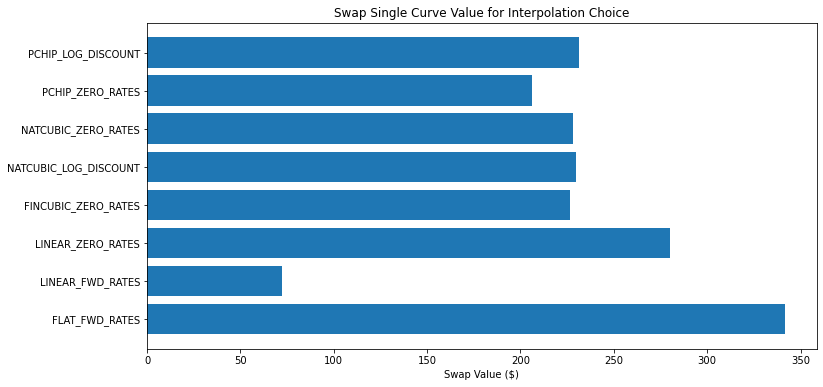

In [14]:
plt.figure(figsize=(12,6))
interp_types = []
for interp_type in InterpTypes:
    interp_types.append(interp_type.name)

vsingle = []
for interp_type in InterpTypes:
    vsingle.append(swapSingleValues[interp_type])

plt.barh(interp_types, vsingle)
plt.title("Swap Single Curve Value for Interpolation Choice")
plt.xlabel("Swap Value ($)");

In [15]:
swapDualValues

{<InterpTypes.FLAT_FWD_RATES: 1>: 360.8241879987909,
 <InterpTypes.LINEAR_FWD_RATES: 2>: 90.40321266182582,
 <InterpTypes.LINEAR_ZERO_RATES: 4>: 299.7992184767354,
 <InterpTypes.FINCUBIC_ZERO_RATES: 7>: 244.9217901740194,
 <InterpTypes.NATCUBIC_LOG_DISCOUNT: 8>: 248.85413268390403,
 <InterpTypes.NATCUBIC_ZERO_RATES: 9>: 246.87345991985057,
 <InterpTypes.PCHIP_ZERO_RATES: 10>: 224.7356232025195,
 <InterpTypes.PCHIP_LOG_DISCOUNT: 11>: 250.46311616458115}

We can plot a histogram of the results

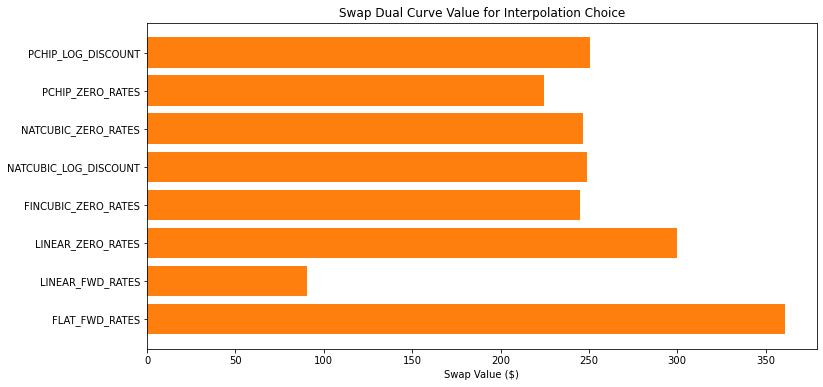

In [16]:
plt.figure(figsize=(12,6))
interp_types = []
for interp_type in InterpTypes:
    interp_types.append(interp_type.name)

vdual = []
for interp_type in InterpTypes:
    vdual.append(swapDualValues[interp_type])

plt.barh(interp_types, vsingle)
plt.barh(interp_types, vdual)

plt.title("Swap Dual Curve Value for Interpolation Choice")
plt.xlabel("Swap Value ($)");

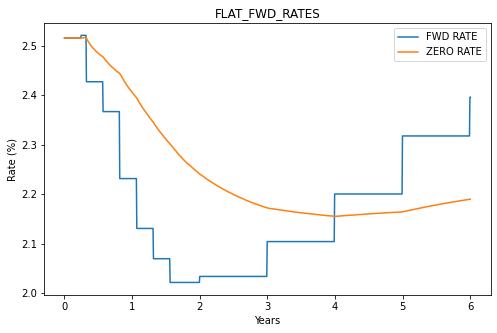

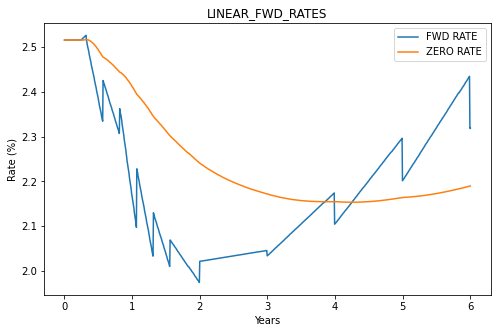

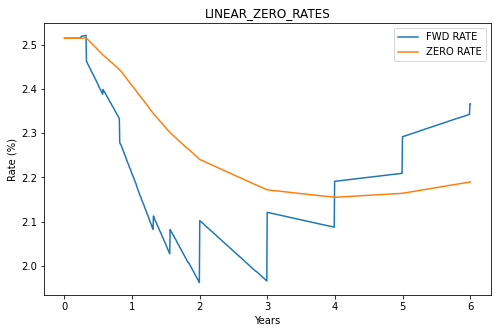

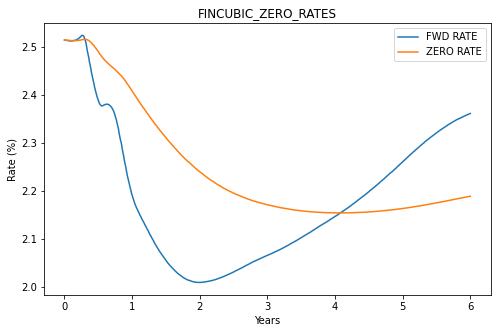

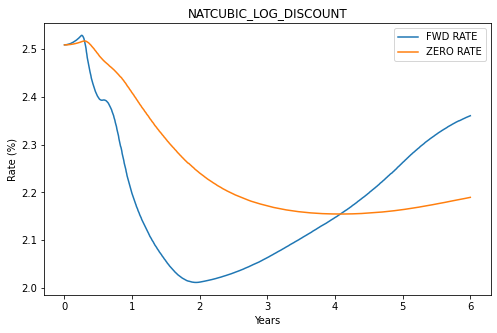

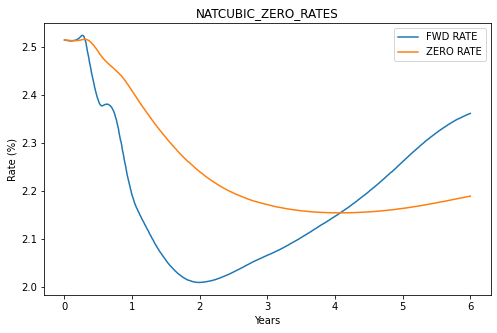

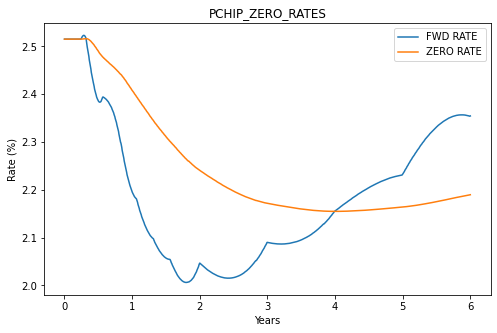

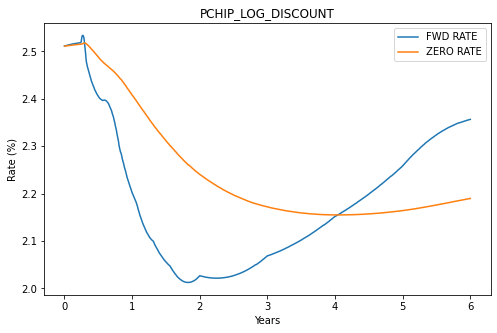

In [18]:
years = np.linspace(0, 6, 1000)
plotDates = settlement_date.add_years(years)

for interp_type in InterpTypes:

    plt.figure(figsize=(8,5))
    iborCurve = iborDualCurves[interp_type]
    iborCurveFwdRate = iborCurve.fwd_rate(plotDates, "1D")
    iborCurveZeroRate = iborCurve.zero_rate(plotDates)
    
    plt.plot(years, iborCurveFwdRate*100.0, label="FWD RATE")
    plt.plot(years, iborCurveZeroRate*100.0, label="ZERO RATE")

    plt.title(interp_type.name)
    plt.xlabel("Years")
    plt.ylabel("Rate (%)")
    plt.legend();
    

Copyright (c) Dominic O'Kane 2020